<a href="https://colab.research.google.com/github/bellahj0323/Graduation_Thesis_2019/blob/master/%EC%A1%B8%EB%85%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. 환경 설정**

### Google Drive

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


### Git

In [0]:
# git clone and set directory name
!git clone https://github.com/bellahj0323/Graduation_Thesis_2019.git github
%cd github

Cloning into 'github'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 24 (delta 4), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (24/24), done.
/content/github


### Modules

In [0]:
!pip install -r requirements.txt

import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
from importlib.machinery import SourceFileLoader

import keras
import keras.layers as L
from keras.models import Model
from keras import backend as K

In [0]:
%cd /content

/content


In [0]:
from PIL import Image
import numpy as np
import os

%cd '/content/drive/My Drive/졸업논문/dataset/UCSDped1/Train/Train001'
img = Image.open('005.tif')
img.show()

imgarray = np.array(img)
imgarray.shape

/content/drive/My Drive/졸업논문/dataset/UCSDped1/Train/Train001


(158, 238)

Original dataset shape = (158,238)

## 2. Model 설계

### ConvLSTM

In [0]:
from keras.models import Model, Sequential
from keras.layers.convolutional import Conv3D, Conv2DTranspose
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers.normalization import BatchNormalization
import numpy as np
import pylab as plt

# (n_frames, rows, cols, channels) input shape
# (None, 158, 238, 1)

model = Sequential()

model.add(Conv3D(filters=10, kernel_size=(3,3,3)
                 ,strides=2, padding='same', data_format='channels_last'
                 ,activation='relu', kernel_initializer='he_normal'
                ,input_shape=(None,158,238,1)))

model.add(ConvLSTM2D(filters=32, kernel_size=(3,3)
                     ,activation='relu',data_format='channels_last'
                     ,padding='same',return_sequences=False))

model.add(BatchNormalization())

model.add(Conv2DTranspose(filters=1, kernel_size=(3,3)
                          ,strides=2, padding='same', data_format='channels_last'
                          ,activation='relu',kernel_initializer='he_normal'))

In [0]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_14 (Conv3D)           (None, None, 79, 119, 10) 280       
_________________________________________________________________
conv_lst_m2d_37 (ConvLSTM2D) (None, 79, 119, 32)       48512     
_________________________________________________________________
batch_normalization_20 (Batc (None, 79, 119, 32)       128       
_________________________________________________________________
conv2d_transpose_4 (Conv2DTr (None, 158, 238, 1)       289       
Total params: 49,209
Trainable params: 49,145
Non-trainable params: 64
_________________________________________________________________


### Data loader

In [0]:
import os
import cv2
import numpy as np
import pandas as pd
from PIL import Image

class Dataset:
  def __init__(self, directory, batch_size, batch_per_video, seq, offset):
    self.directory = directory
    self.videos = [os.path.join(self.directory, i) for i in os.listdir(directory)]
    self.batch_size = batch_size
    self.batch_per_video = batch_per_video
    self.seq = seq
    self.offset = offset
    
  def random_frames(self):
    video_idx = np.random.randint(low=0, high=len(self.videos)-seq)
    video = self.videos[video_idx]
    # video 선택 했으니까 frame np.array로 불러오기
    
    
  def train_loader(self):
    while True:
      for i in range(int(self.batch_size/self.batch_per_video)):
        x, y = self.random_frames()
        if i == 0:
          batch_x = x
          batch_y = y
        else:
          batch_x = np.concatenate((batch_x, x), axis=1)
          batch_y = np.concatenate((batch_y, y), axis=0)
         
      batch_x = list(batch_x)
      yield batch_x, batch_y
      
  def test_loader(self, video_idx):
    video = self.videos[video_idx]
    # video 선택 했으니까 frame np.array로 불러오기    
  

## MNIST 예제

In [0]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = mnist.load_data()

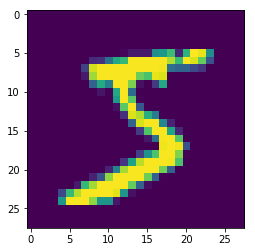

Label:  5


In [0]:
plt.imshow(x_train[0])
plt.show()
print('Label: ', y_train[0])